Using TensorFlow backend.


(50000, 28, 28) (50000,)


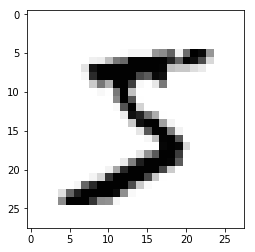

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Printing the shapes of the data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_val shape", X_val.shape)
print("y_val shape", y_val.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 28, 28)
y_train shape (50000,)
X_val shape (10000, 28, 28)
y_val shape (10000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
# Our network expects (None, 784) shaped data.
X_train = np.reshape(X_train, (50000, 784))
X_test = np.reshape(X_test, (10000, 784))

In [5]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

X_train shape :  (50000, 784)
X_test shape :  (10000, 784)


In [6]:
# This cell contains our feed forward neural network.
# Operation order is like this 
# Linear_forward->ReLu->Linear_forward->ReLu->Linear_forward->Softmax

# I used tf.get_variable for defining the variables with xavier_initializer()
# which is -> x = sqrt(6. / (in + out))
# https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer
X = tf.placeholder(tf.float32, shape=(None, 784), name='input_data')

W1 = tf.get_variable("W1", shape=(784, 128), initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.zeros(shape=(128)))
a1 = tf.matmul(X, W1) + b1
z1 = tf.nn.relu(a1)

W2 = tf.get_variable("W2", shape=(128, 128), initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.zeros(shape=(128)))
a2 = tf.matmul(z1, W2) + b2
z2 = tf.nn.relu(a2)

W3 = tf.get_variable("W3", shape=(128, 10), initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.zeros(shape=(10)))
z3 = tf.matmul(z2, W3) + b3

y = tf.nn.softmax(z3)

In [7]:
# This variable will hold our labels.
y_ = tf.placeholder(dtype=tf.int64, shape=(None))

In [8]:
# loss function to calculate gradients.
loss = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=y)
# We use adam optimizer to minimize the loss function.
optimizer = tf.train.AdamOptimizer().minimize(loss)

Training started.
Loss after epoch 0 : 1.5218993425369263
Loss after epoch 1 : 1.5072813034057617
Loss after epoch 2 : 1.4967666864395142
Loss after epoch 3 : 1.491233229637146
Loss after epoch 4 : 1.4904087781906128
Loss after epoch 5 : 1.4867184162139893
Loss after epoch 6 : 1.4808650016784668
Loss after epoch 7 : 1.4834506511688232
Loss after epoch 8 : 1.481643795967102
Loss after epoch 9 : 1.4847134351730347
Loss after epoch 10 : 1.4772961139678955
Loss after epoch 11 : 1.4812266826629639
Loss after epoch 12 : 1.4794018268585205
Loss after epoch 13 : 1.4784969091415405
Loss after epoch 14 : 1.4805785417556763
Loss after epoch 15 : 1.4752949476242065
Loss after epoch 16 : 1.476860523223877
Loss after epoch 17 : 1.4728806018829346
Loss after epoch 18 : 1.477700114250183
Loss after epoch 19 : 1.4733928442001343


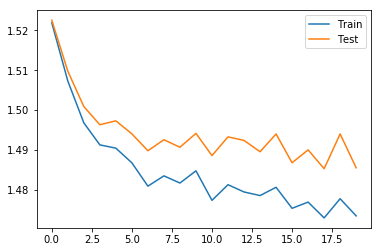

Train accuracy :  0.9876
Test accuracy :  0.9755


In [10]:
batch_size = 32
EPOCHS = 20
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_loss = []
    test_loss = []
    print("Training started.")
    for epoch in range(0, EPOCHS):
        for batch in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[batch:batch+batch_size], y_:y_train[batch:batch+batch_size]})
        
        train_loss.append(sess.run(loss, feed_dict={X:X_train, y_:y_train}))
        test_loss.append(sess.run(loss, feed_dict={X:X_test, y_:y_test}))
        # printing the current loss after every epoch.
        print("Loss after epoch {} : {}".format(epoch, train_loss[-1]))
    # Plotting the train and test loss
    total_iter = list(range(EPOCHS))
    plt.plot(total_iter, train_loss, label='Train')
    plt.plot(total_iter, test_loss, label='Test')
    plt.legend(['Train', 'Test'])
    plt.show()
    
    # Metrics to use calculating the accuracy.
    correct_prediction = tf.equal(tf.argmax(y, 1), y_)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Accuracy on the train and test set.
    train_acc = accuracy.eval(feed_dict={X: X_train,y_: y_train })
    test_acc = accuracy.eval(feed_dict={X: X_test,y_: y_test })
    print("Train accuracy : ", train_acc)
    print("Test accuracy : ", test_acc)